In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import json
import statsmodels.api as sm
import folium

In [3]:
carpetas= pd.read_csv("../carpetas_completa_marzo_2022.csv")

C:\Users\Tania\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
carpetas.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [7]:
carpetas.shape

(1422564, 19)

In [8]:
carpetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422564 entries, 0 to 1422563
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1422102 non-null  float64
 1   mes_hechos            1422102 non-null  object 
 2   fecha_hechos          1422102 non-null  object 
 3   ao_inicio             1422564 non-null  int64  
 4   mes_inicio            1422564 non-null  object 
 5   fecha_inicio          1422561 non-null  object 
 6   delito                1422564 non-null  object 
 7   fiscalia              1422562 non-null  object 
 8   agencia               1422564 non-null  object 
 9   unidad_investigacion  1422337 non-null  object 
 10  categoria_delito      1422564 non-null  object 
 11  calle_hechos          1418412 non-null  object 
 12  calle_hechos2         547210 non-null   object 
 13  colonia_hechos        1361075 non-null  object 
 14  alcaldia_hechos       1418327 non-

**1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.**

* Identificar que los registros en cada columna, sean consistentes, es decir que tengan el mismo formato de acuerdo a lo que representan.

* Identificar que los registros se enecuentren dentro de los rangos usuales para cada variable.

* Verificar que no haya filas repetidas. 

* Identificar que una columna realmente aporte información, si hay una gran cantidad de datos nulos o todos son repetidos considerar si nos sirve para el análisis. 


**2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?**

In [9]:
carpetas = carpetas.drop_duplicates()

In [10]:
carpetas.shape

(1422564, 19)

In [11]:
carpetas["fecha_hechos"] = pd.to_datetime(carpetas["fecha_hechos"], format="%Y-%m-%d %H:%M:%S")
#Hay un registro de fecha que no tiene el formato que necesitamos

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 222-03-20 01:30:00

In [13]:
carpetas.ao_hechos.unique()

array([2016., 2015., 2012., 2014., 2011., 2008., 2006., 2010., 2013.,
       2005., 2009.,   nan, 1955., 2004., 2002., 1998., 1997., 1965.,
       2007., 2000., 1987., 1999., 1956., 2001., 1996., 1986., 1915.,
       1988., 2017., 2003., 1991., 1993., 1977., 1984., 1995., 1994.,
       1990., 1992., 1978., 1989., 1972., 2018., 2019., 1974., 1970.,
       1980., 1976., 1983., 1985., 1966., 1969., 1981., 1960., 1982.,
       1975., 1954., 1973., 1964., 1968., 1963., 1971., 1958., 1942.,
       1930., 1979., 1906., 1962., 1957., 2020., 1950., 1952., 2021.,
       1967., 1961., 1917., 2022.,  222.])

In [14]:
carpetas[carpetas["ao_hechos"]==222.0 ]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1414440,222.0,Marzo,0222-03-20 01:30:00,2022,Marzo,2022-03-20 09:18:47,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLI...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN COYOACÁN,UAT-COY-5,UI-1SD,DELITO DE BAJO IMPACTO,LACANDONES,ZAPOECAS,CHIMALCOYOTL,TLALPAN,FUERO COMUN,-99.169772,19.271696,NaN


In [15]:
carpetas.loc[carpetas.ao_hechos==222.0,"fecha_hechos"]="2022-03-20 01:30:00"

In [16]:
carpetas.loc[carpetas.ao_hechos==222.0,"ao_hechos"]=2022.0

In [17]:
carpetas["fecha_hechos"] = pd.to_datetime(carpetas["fecha_hechos"], format="%Y-%m-%d %H:%M:%S")

In [18]:
carpetas.fecha_hechos.min()

Timestamp('1906-06-02 19:00:00')

In [19]:
carpetas.fecha_hechos.max()

Timestamp('2022-03-31 23:31:00')

In [20]:
carpetas["fecha_inicio"] = pd.to_datetime(carpetas["fecha_inicio"], format="%Y-%m-%d %H:%M:%S")

In [21]:
carpetas.fecha_inicio.min()

Timestamp('2016-01-01 01:35:06')

In [22]:
carpetas.fecha_inicio.max()

Timestamp('2022-03-31 23:58:05')

**Respuesta: Hay registrados 1,422,564 delitos ocurridos entre las fechas 1906-06-02 19:00:00 y 2022-03-31 23:31:00 pero la fecha de inicio de la carpeta de investigación de estos delitos va de 2016-01-01 01:35:06 a 2022-03-31 23:58:05**


**3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?**

In [23]:
carpetas=carpetas[carpetas.alcaldia_hechos.isin(["CUAUHTEMOC", "IZTAPALAPA", "GUSTAVO A MADERO", "BENITO JUAREZ", "ALVARO OBREGON","COYOACAN","MIGUEL HIDALGO", "TLALPAN", "VENUSTIANO CARRANZA","AZCAPOTZALCO", "IZTACALCO", "XOCHIMILCO","TLAHUAC","LA MAGDALENA CONTRERAS","CUAJIMALPA DE MORELOS","MILPA ALTA"])]
carpetas.delito.value_counts()

VIOLENCIA FAMILIAR                                   153670
FRAUDE                                                91326
ROBO DE OBJETOS                                       82096
AMENAZAS                                              79594
ROBO A NEGOCIO SIN VIOLENCIA                          68944
                                                      ...  
ROBO DE VEHICULO Y NOMINA CON VIOLENCIA                   1
PROCREACION ASISTIDA                                      1
ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA         1
CALUMNIAS                                                 1
SECUESTRO                                                 1
Name: delito, Length: 347, dtype: int64

**Respuesta: Los 5 delitos mas frecuentes en los datos registrados son: violencia familiar, fraude, robo de objetos, amenazas y robo a negocio sin violencia**

**4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).**

In [24]:
carpetas[carpetas.fecha_hechos.isnull()==True]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
628,NaN,NaN,NaT,2016,Febrero,2016-02-04 18:53:05,VIOLENCIA FAMILIAR,JUZGADOS FAMILIARES,75,UI-2SD,DELITO DE BAJO IMPACTO,FRANCISCO I. MADERO,NaN,SANTA MARTHA ACATITLA,IZTAPALAPA,NaN,-99.009777,19.362143,NaN
784,NaN,NaN,NaT,2016,Febrero,2016-02-05 16:03:58,EXTORSION,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2CD,DELITO DE BAJO IMPACTO,STA. MARIA,NaN,MAGDALENA ATLAZOLPA,IZTAPALAPA,NaN,-99.110716,19.373883,NaN
2815,NaN,NaN,NaT,2016,Febrero,2016-02-17 01:46:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-5,UI-1CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,VOLCAN CEBORUCO,FRANCISCO MORAZAN,LA PRADERA,GUSTAVO A MADERO,NaN,-99.067324,19.472209,NaN
3687,NaN,NaN,NaT,2016,Enero,2016-01-04 17:15:51,ROBO A CASA HABITACION SIN VIOLENCIA,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-3SD,DELITO DE BAJO IMPACTO,ANDADOR ORIENTE 112-A,NaN,JUVENTINO ROSAS,IZTACALCO,NaN,-99.112368,19.391504,NaN
3819,NaN,NaN,NaT,2016,Enero,2016-01-05 14:12:57,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,DELITO DE BAJO IMPACTO,CUAHUTEMOC (PLAZA DELTA),XOCHICALCO,PIEDAD NARVARTE,BENITO JUAREZ,NaN,-99.154278,19.403459,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400222,NaN,NaN,NaT,2022,Febrero,2022-02-27 11:09:30,VIOLENCIA FAMILIAR,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE VIOLEN...,75,Unidad de investigación 7 S/D,DELITO DE BAJO IMPACTO,LAGO NAUR,NaN,CUAUHTÉMOC PENSIL,MIGUEL HIDALGO,FUERO COMUN,-99.192931,19.446777,NaN
1404545,NaN,NaN,NaT,2022,Marzo,2022-03-05 11:35:13,ROBO A PASAJERO EN ECOBUS CON VIOLENCIA,FISCALÍA DE JUSTICIA PENAL PARA ADOLESCENTES,AEJPA,2 CON DETENIDO,DELITO DE BAJO IMPACTO,PERIFERICO,NaN,MERCED GÓMEZ,ALVARO OBREGON,FUERO COMUN,-99.191538,19.368351,NaN
1404764,NaN,NaN,NaT,2022,Marzo,2022-03-05 17:57:41,ROBO DE OBJETOS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,UAT-CUH-6,UI-1SD,DELITO DE BAJO IMPACTO,SIMON BOLIVAR,NaN,CENTRO,CUAUHTEMOC,FUERO COMUN,-99.138756,19.431303,NaN
1414037,NaN,NaN,NaT,2022,Marzo,2022-03-19 12:59:27,ROBO DE OBJETOS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...,UAT-AO-4,UI-1SD,DELITO DE BAJO IMPACTO,SEMINARIO,NaN,CENTRO,CUAUHTEMOC,FUERO COMUN,-99.132169,19.433337,NaN


In [25]:
carpetas[carpetas.fecha_hechos.isnull()==True].shape[0]/carpetas.shape[0]*100
#Es un porcentaje muy pequeño de todos los datos aquellos que no tienen fecha de los hechos y como he visto atras, 
#no le puedo asignar la fecha de inicio de la carpeta de investigación porque no siempre coinciden. podemos no tomarlos en 
#cuenta para este análisis.

0.03183756021953703

Observaremos que tanto han disminuido o aumentado la cantidad de delitos de cada tipo comparando, el promedio de delitos al mes del año anterior con el promedio de delitos al mes de los datos de este año 

In [26]:
del_21=carpetas[(carpetas.ao_hechos==2021)]

In [27]:
tab1=del_21.groupby(["delito","mes_hechos"])["delito"].count().to_frame()

In [28]:
tab1.rename(columns={'delito': 'med_mes_2021'}, inplace=True)


In [29]:
tab1.reset_index(inplace=True)
tab1

,delito,mes_hechos,med_mes_2021
0,ABORTO,Abril,6
1,ABORTO,Agosto,6
2,ABORTO,Diciembre,6
3,ABORTO,Enero,6
4,ABORTO,Febrero,9
...,...,...,...
2625,VIOLENCIA FAMILIAR,Marzo,3273
2626,VIOLENCIA FAMILIAR,Mayo,3205
2627,VIOLENCIA FAMILIAR,Noviembre,2701
2628,VIOLENCIA FAMILIAR,Octubre,2975


In [30]:
#Lo que se muestra en esta tabla es la media de delitos al mes durante el año 2021
del_21=tab1.groupby(["delito"])["med_mes_2021"].mean().to_frame().sort_values("med_mes_2021", ascending=False)

In [31]:
del_21

,med_mes_2021
delito,
VIOLENCIA FAMILIAR,2855.833333
AMENAZAS,1379.000000
FRAUDE,1323.666667
ROBO DE OBJETOS,966.250000
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,730.416667
...,...
DDH INCOMPETENCIA,1.000000
ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA,1.000000
ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA,1.000000


In [32]:
del_22=carpetas[(carpetas.ao_hechos==2022)]

In [33]:
tab2=del_22.groupby(["delito","mes_hechos"])["delito"].count().to_frame()

In [34]:
tab2.rename(columns={'delito': 'med_mes_2022'}, inplace=True)
tab2.reset_index(inplace=True)

In [35]:
#Lo que se muestra en esta tabla es la media de delitos al mes durante el año 2022
del_22=tab2.groupby(["delito"])["med_mes_2022"].mean().to_frame().sort_values("med_mes_2022", ascending=False)

In [36]:
del_22

,med_mes_2022
delito,
VIOLENCIA FAMILIAR,2488.666667
AMENAZAS,1207.000000
FRAUDE,1066.333333
ROBO DE OBJETOS,874.000000
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,692.000000
...,...
ROBO DE MERCANCIA EN CONTENEDEROS EN ÁREAS FEDERALES,1.000000
ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA,1.000000
CONTRA LA LEY FEDERAL DE POBLACION,1.000000


In [37]:
del_1 = pd.merge(del_21, del_22, how='outer', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True)
del_21_22=del_1.fillna(0)

In [38]:
del_21_22["diferencia"]=del_21_22.med_mes_2022-del_21_22.med_mes_2021
del_21_22["%diferencia"]=del_21_22.diferencia/del_21_22.med_mes_2021*100

In [39]:
pd.set_option('max_rows', None)
del_21_22.sort_values("%diferencia")
#Esta tabla nos muestra la diferencia entre la cantidad de delitos promedio por mes en el año 2021 y 2022 así como 
#las cantidades antes y despues y el porcentaje de incremento o decremento 

,med_mes_2021,med_mes_2022,diferencia,%diferencia
delito,,,,
ROBO DE MAQUINARIA SIN VIOLENCIA,1.400000,0.000000,-1.400000,-100.000000
ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA,1.500000,0.000000,-1.500000,-100.000000
EXPOSICION DE MENORES,1.000000,0.000000,-1.000000,-100.000000
HOMICIDIO CULPOSO FUERA DEL D.F (COLISION),1.000000,0.000000,-1.000000,-100.000000
HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO),1.500000,0.000000,-1.500000,-100.000000
PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA,1.250000,0.000000,-1.250000,-100.000000
HOMICIDIO CULPOSO,1.000000,0.000000,-1.000000,-100.000000
DDH INCOMPETENCIA,1.000000,0.000000,-1.000000,-100.000000
PERDIDA DE LA VIDA POR DERRUMBE,1.166667,0.000000,-1.166667,-100.000000


In [40]:
del_21_22[del_21_22.med_mes_2022==0].sort_values("med_mes_2021", ascending=False)
#Estos son los delitos que no se han presentado en los meses de enero a marzo del 2022, aún así podemos ver que el
#promedio al mes de estos delitos fue muy bajo en 2021

,med_mes_2021,med_mes_2022,diferencia,%diferencia
delito,,,,
VIOLACION DE LA INTIMIDAD,4.000000,0.0,-4.000000,-100.0
ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA,2.200000,0.0,-2.200000,-100.0
ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA,2.000000,0.0,-2.000000,-100.0
"EXPLOTACIÓN LABORAL DE MENORES, PERSONAS CON DISCAPACIDAD FÍSICA O MENTAL Y ADULTOS MAYORES",1.666667,0.0,-1.666667,-100.0
DENUNCIA DE HECHOS,1.600000,0.0,-1.600000,-100.0
ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA,1.500000,0.0,-1.500000,-100.0
HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO),1.500000,0.0,-1.500000,-100.0
ROBO DE MAQUINARIA SIN VIOLENCIA,1.400000,0.0,-1.400000,-100.0
ATAQUES A LA PAZ PUBLICA,1.333333,0.0,-1.333333,-100.0


In [41]:
del_21_22[del_21_22.med_mes_2021==0]
#Estos son los delitos que no se presentaron en 2021 pero si en 2022, de igual modo, podemos ver que el promedio al mes no 
#no es muy alto.

,med_mes_2021,med_mes_2022,diferencia,%diferencia
delito,,,,
CONTRA LA LEY FEDERAL DE POBLACION,0.0,1.0,1.0,inf
INJURIAS,0.0,1.0,1.0,inf
ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA,0.0,1.0,1.0,inf
ROBO A PASAJERO EN ECOBUS CON VIOLENCIA,0.0,2.0,2.0,inf


In [42]:
del_21_22[(del_21_22.med_mes_2022!=0) & (del_21_22.med_mes_2021!=0) ].sort_values("%diferencia")
#En esta tabla podemos observar el porcentaje de incremento o decremento de los delitos que se han cometido
#en 2022 con respectoa los cometidos en 2021, el inicio de la tabla nos muestra los delitos que han tenido un mayor porcentaje
#de decrecimiento, mientras que el final de la tabla nos muestra los delitos con un porcentaje de incremento mayor.

,med_mes_2021,med_mes_2022,diferencia,%diferencia
delito,,,,
DELITOS ELECTORALES,47.727273,2.500000,-45.227273,-94.761905
ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA),6.833333,1.500000,-5.333333,-78.048780
USO INDEBIDO DE ATRIBUCIONES Y FACULTADES,3.916667,1.000000,-2.916667,-74.468085
ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA,85.083333,22.666667,-62.416667,-73.359452
ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE),9.818182,2.666667,-7.151515,-72.839506
USURPACION DE PROFESION,5.083333,1.500000,-3.583333,-70.491803
PELIGRO DE CONTAGIO,5.000000,1.500000,-3.500000,-70.000000
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION,4.909091,1.500000,-3.409091,-69.444444
"DELITOS DE ABOGADOS, PATRONOS, LITIGANTES Y ASESORES JURIDICOS",11.333333,4.000000,-7.333333,-64.705882


In [43]:
delitos=del_21_22[(del_21_22.med_mes_2022!=0) & (del_21_22.med_mes_2021!=0) ].sort_values("med_mes_2021", ascending=False)
delitos.head(20).sort_values("%diferencia")
#A pesar de mostrar la tabla anterior donde lo importante es el porcentaje de incremento o decremento en el número de
#delitos, hay muchos de ellos cuya ocurrencia es muy mínima. Por lo que decidí mostrar esta tabla en la que de los 20
#delitos mas comunes en el 2021 podemos ver que los que mas van a la baja son: robo a negocio sin violencia, abuso de confianza,
#despojo, robo a casa habitación sin violencia, robo de vehiculo de servicio particular sin violencia, abuso sexual y fraude.
#mientras que el narco menudeo y las lesiones culposas por transito vehicular van a la alza. 

,med_mes_2021,med_mes_2022,diferencia,%diferencia
delito,,,,
ROBO A NEGOCIO SIN VIOLENCIA,293.583333,181.666667,-111.916667,-38.120920
ABUSO DE CONFIANZA,389.916667,251.666667,-138.250000,-35.456294
DESPOJO,333.500000,243.000000,-90.500000,-27.136432
ROBO A CASA HABITACION SIN VIOLENCIA,261.583333,193.333333,-68.250000,-26.091112
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,302.750000,225.666667,-77.083333,-25.461051
FRAUDE,1323.666667,1066.333333,-257.333333,-19.440947
ABUSO SEXUAL,284.583333,230.333333,-54.250000,-19.062958
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,501.500000,416.666667,-84.833333,-16.915919
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),430.333333,369.333333,-61.000000,-14.175058


**5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?**

In [44]:
carpetas.alcaldia_hechos.value_counts()
#La alcaldía con mas delitos registrados es Cuauhtemoc y la que menos tiene es Milpa Alta. 
#Una de las razones podría ser por el número de habitantes de la delegación, tambien por lo urbanizado de las alcaldías.
#Cuauhtemoc esta en el centro de la CDMX mientras que Milpa Alta presenta una mayor cantidad de área rural.
#Por ultimo tambien puede ser por las colonias que las conforman, puesto que en Cuauhtemoc hay colonias conocidas por un 
#alto indice delictivo 

CUAUHTEMOC                221163
IZTAPALAPA                212361
GUSTAVO A MADERO          143233
BENITO JUAREZ             115697
ALVARO OBREGON             96510
COYOACAN                   95424
MIGUEL HIDALGO             91311
TLALPAN                    83900
VENUSTIANO CARRANZA        81469
AZCAPOTZALCO               69353
IZTACALCO                  59465
XOCHIMILCO                 44952
TLAHUAC                    36370
LA MAGDALENA CONTRERAS     23685
CUAJIMALPA DE MORELOS      21477
MILPA ALTA                 10773
Name: alcaldia_hechos, dtype: int64

**6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos**

In [45]:
pd.set_option('max_rows', 8)
alcaldias=["CUAUHTEMOC","IZTAPALAPA","GUSTAVO A MADERO","BENITO JUAREZ","ALVARO OBREGON","COYOACAN","MIGUEL HIDALGO","TLALPAN","VENUSTIANO CARRANZA","AZCAPOTZALCO","IZTACALCO","XOCHIMILCO","TLAHUAC","LA MAGDALENA CONTRERAS","CUAJIMALPA DE MORELOS","MILPA ALTA"]
for alcaldia in alcaldias:
    carp=carpetas[(carpetas.alcaldia_hechos == alcaldia)]
    print(f"{alcaldia}")
    print(carp.groupby(["colonia_hechos"])["colonia_hechos"].count().sort_values(ascending=False)[0:3])
    print("-"*10)
    

CUAUHTEMOC
colonia_hechos
CENTRO        45449
DOCTORES      27265
ROMA NORTE    16763
Name: colonia_hechos, dtype: int64
----------
IZTAPALAPA
colonia_hechos
CENTRAL DE ABASTO                 9319
LOMAS DE SAN LORENZO              5197
DESARROLLO URBANO QUETZALCOATL    5191
Name: colonia_hechos, dtype: int64
----------
GUSTAVO A MADERO
colonia_hechos
LINDAVISTA             6096
GUADALUPE TEPEYAC      5452
SAN FELIPE DE JESÚS    4358
Name: colonia_hechos, dtype: int64
----------
BENITO JUAREZ
colonia_hechos
DEL VALLE CENTRO    19968
NARVARTE            14590
PORTALES SUR         7746
Name: colonia_hechos, dtype: int64
----------
ALVARO OBREGON
colonia_hechos
JARDINES DEL PEDREGAL    4328
ZEDEC SANTA FE           3224
SAN ANGEL                3217
Name: colonia_hechos, dtype: int64
----------
COYOACAN
colonia_hechos
PEDREGAL DE SANTO DOMINGO    8764
AJUSCO                       4785
PEDREGAL DE SANTA URSULA     4558
Name: colonia_hechos, dtype: int64
----------
MIGUEL HIDALGO
colonia_hec

**7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?**


Vamos a estudiar la cantidad de delitos a lo largo del tiempo 

In [46]:
carpetas["fecha_del"]=carpetas.fecha_hechos.apply(lambda fecha: fecha.date())

In [47]:
st=carpetas.groupby(["fecha_del"])["delito"].count().to_frame()

In [48]:
st.rename(columns={"delito":"no.delitos"}, inplace=True)

In [49]:
st.reset_index(inplace=True)

In [50]:
st["día de la semana"]=st["fecha_del"].apply(lambda fecha: pd.Timestamp(f"{fecha}").day_name())

In [51]:
st["mes"]=st["fecha_del"].apply(lambda fecha: pd.Timestamp(f"{fecha}").month_name())

In [52]:
st["semana"]=st["fecha_del"].apply(lambda fecha: pd.Timestamp(f"{fecha}").week)

In [53]:
st["año"]=st["fecha_del"].apply(lambda fecha: pd.Timestamp(f"{fecha}").year)

In [54]:
st["quincena"]=0
for i in range (0,st.shape[0]):
    if st.fecha_del[i].day%15==0:
        st["quincena"][i]=1


<ipython-input-54-cf01d276f2ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st["quincena"][i]=1


In [55]:
st
#Esta tabla nos muestra el día de la semana, mes y semana que corresponde a la fecha de cada delito y si era día
#de quincena o no, la usaremos mas adelante para crear una regresión lineal de tal manera que los p values de los 
#coeficientes nos indiquen la importancia de estas variables en el número de delitos con el tiempo

,fecha_del,no.delitos,día de la semana,mes,semana,año,quincena
0,1906-06-02,1,Saturday,June,22,1906,0
1,1915-01-10,1,Sunday,January,1,1915,0
2,1915-09-10,1,Friday,September,36,1915,0
3,1917-09-01,1,Saturday,September,35,1917,0
...,...,...,...,...,...,...,...
6430,2022-03-28,427,Monday,March,13,2022,0
6431,2022-03-29,468,Tuesday,March,13,2022,0
6432,2022-03-30,369,Wednesday,March,13,2022,1
6433,2022-03-31,219,Thursday,March,13,2022,0


In [56]:
#Veremos una gráfica del número de delitos en el tiempo desde el año en que inician las carpetas de investigación 
st1=st[(st.año>=2016)]

In [57]:
st2=st1[["fecha_del","no.delitos"]]

In [58]:
st2.fecha_del=st2.fecha_del.astype("datetime64")

C:\Users\Tania\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
st2.set_index(st2.fecha_del,inplace=True)

In [60]:
st2.drop("fecha_del" ,axis=1, inplace=True)


C:\Users\Tania\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
st3=st2.resample('MS').mean()

<Figure size 432x288 with 0 Axes>

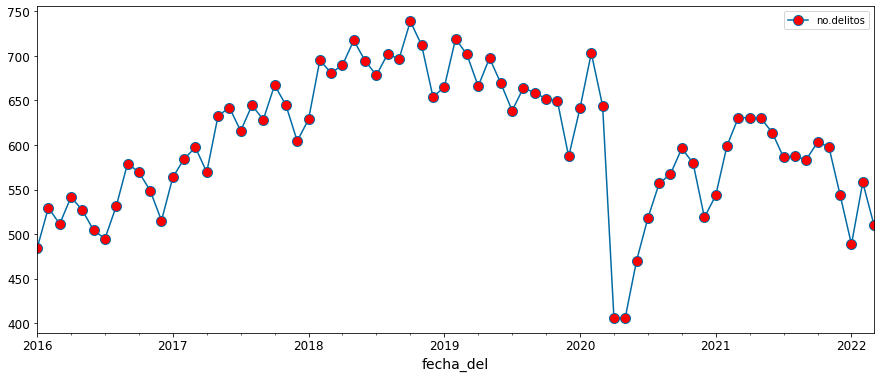

In [62]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
fig = plt.figure(facecolor='w')
plt.style.use('tableau-colorblind10')
st3.plot(figsize = (15,6), marker = 'o', markersize = 10, markerfacecolor = 'r')
plt.show()
#Esta gráfica muestra el número como cambia el promedio diario mensual de los delitos desde el año 2016 al 2022
#Podemos visualizar que al inicio de la pandemia hubo una caida en el promedio diario de delitos cometidos y posteriormente 
#aunque fue aumentando la cantidad de delitos, no llego a los niveles que habia entre los años 2018 y 2019

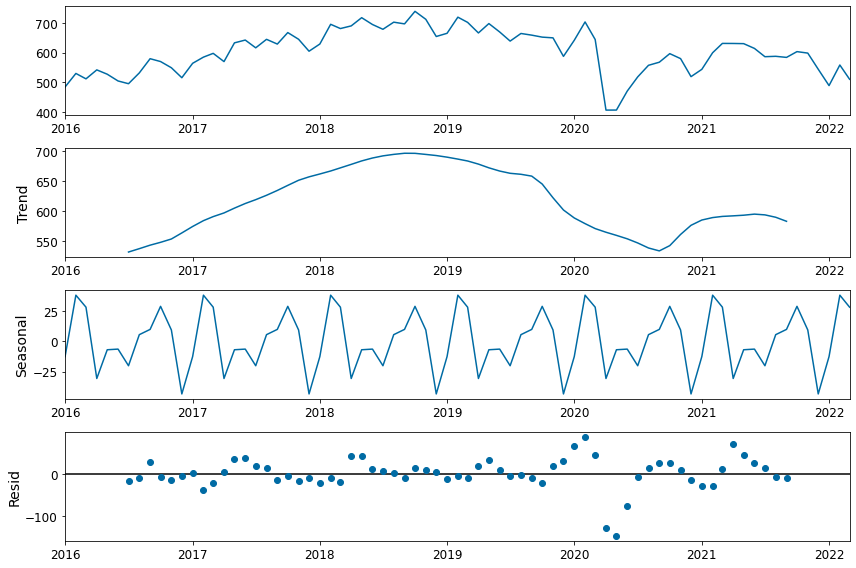

In [63]:
plt.rcParams['figure.figsize'] = 12,8
decomp_add = sm.tsa.seasonal_decompose(st3)
decomp_add.plot()
plt.show()
#Descomponemos esta serie de tiempo en su tendencia y estacionalidad, gráficamente podemos visualizar que a finales de año 
#se presenta un decremento y un poco despues de empezado el año una subida, hay aprox 4 puntos de incremento cada año 

In [64]:
st1.groupby(["día de la semana"])["no.delitos"].mean().sort_values()
#Podemos observar que los días en que en promedio hay mas delitos son los viernes, en hgeneral entre semana 
#hay un promedio parecido que baja en fin de semana, siendo el domingo el día con menos delitos en promedio registrados. 

día de la semana
Sunday       501.668712
Saturday     553.757669
Thursday     622.395706
Tuesday      627.757669
Wednesday    632.239264
Monday       632.530675
Friday       656.000000
Name: no.delitos, dtype: float64

In [65]:
st1.groupby(["mes"])["no.delitos"].mean().sort_values()
#Podemos observar que octubre es el mes con mayor promedio de delitos diarios seguido de Febrero mientras que diciembre y 
#enero, son los mese con menor promedio de delitos diarios. 

mes
December     570.494624
January      573.447005
April        583.850000
July         588.548387
                ...    
September    618.950000
November     622.061111
February     626.838384
October      637.801075
Name: no.delitos, Length: 12, dtype: float64

In [66]:
st1.groupby(["semana"])["no.delitos"].mean().sort_values()
#las semanas con mayor promedio son la 9(febrero), 41,42(octubre) y 48 y las de menos son 52,53,1,51(diciembre y enero)

semana
52    489.428571
53    520.900000
1     540.897959
51    564.714286
         ...    
48    640.857143
42    643.523810
41    647.595238
9     660.428571
Name: no.delitos, Length: 53, dtype: float64

In [67]:
st1["lag1"] = st1["no.delitos"].shift(1)

<ipython-input-67-333d619d620c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st1["lag1"] = st1["no.delitos"].shift(1)


In [68]:
st1.drop("fecha_del", axis=1, inplace=True)

C:\Users\Tania\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
st1 = pd.get_dummies(data=st1, drop_first=False)

In [70]:
st1.reset_index(drop=True, inplace=True)

In [71]:
st1 = st1.drop(0)

In [72]:
X=st1.drop(["no.delitos", "año"], axis=1)
X

,semana,quincena,lag1,día de la semana_Friday,día de la semana_Monday,día de la semana_Saturday,día de la semana_Sunday,día de la semana_Thursday,día de la semana_Tuesday,día de la semana_Wednesday,...,mes_December,mes_February,mes_January,mes_July,mes_June,mes_March,mes_May,mes_November,mes_October,mes_September
1,53,0,560.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,53,0,398.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,376.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,574.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,13,0,435.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2279,13,0,427.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2280,13,1,468.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2281,13,0,369.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
y=st1["no.delitos"]

In [74]:
X = sm.add_constant(X, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             no.delitos   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     181.3
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        08:38:01   Log-Likelihood:                -12802.
No. Observations:                2281   AIC:                         2.565e+04
Df Residuals:                    2260   BIC:                         2.577e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
semana              

In [75]:
#Las variables de la semana cuyos p-values nos indican que su coeficientes son significativamente
#distinto de cero, son: todos los días de la semana, los meses febrero, junio, marzo, mayo, agosto,abril, enero, y la quincena 
#Siendo los de mayor relevancia el día lunes,el sábado, viernes y domingo, quincena y mes de febrero. Siendo sábado y
#domingo negativos lo cuál indica que en esos días habia un desenso de los delitos. 

**8) ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.**

In [76]:
def info_alc (alcaldia):
    carp=carpetas[(carpetas.alcaldia_hechos == alcaldia)]
    tabla=carp.delito.value_counts().to_frame().reset_index()
    tabla["freq"]=tabla.delito/tabla.delito.sum()*100
    tabla["alcaldia"]=f"{alcaldia}"
    return tabla.head(30)
    

In [77]:
CUAUHTEMOC=info_alc("CUAUHTEMOC")
IZTAPALAPA=info_alc("IZTAPALAPA")
GUSTAVO_A_MADERO=info_alc("GUSTAVO A MADERO")
BENITO_JUAREZ=info_alc("BENITO JUAREZ")
ALVARO_OBREGON=info_alc("ALVARO OBREGON")
COYOACAN=info_alc("COYOACAN")
MIGUEL_HIDALGO=info_alc("MIGUEL HIDALGO")
TLALPAN=info_alc("TLALPAN")
VENUSTIANO_CARRANZA=info_alc("VENUSTIANO CARRANZA")
AZCAPOTZALCO=info_alc("AZCAPOTZALCO")
IZTACALCO=info_alc("IZTACALCO")
XOCHIMILCO=info_alc("XOCHIMILCO")
TLAHUAC=info_alc("TLAHUAC")
LA_MAGDALENA_CONTRERAS=info_alc("LA MAGDALENA CONTRERAS")
CUAJIMALPA_DE_MORELOS=info_alc("CUAJIMALPA DE MORELOS")
MILPA_ALTA=info_alc("MILPA ALTA")

In [78]:
tab=pd.concat([CUAUHTEMOC, IZTAPALAPA, GUSTAVO_A_MADERO, BENITO_JUAREZ, ALVARO_OBREGON,COYOACAN,MIGUEL_HIDALGO, TLALPAN, VENUSTIANO_CARRANZA,AZCAPOTZALCO, IZTACALCO, XOCHIMILCO,TLAHUAC,LA_MAGDALENA_CONTRERAS,CUAJIMALPA_DE_MORELOS,MILPA_ALTA], axis=0)
tab.reset_index(drop=True, inplace=True)
tab.rename(columns={"index":"delitos", "delito":"cantidad"}, inplace=True)

while tab.shape[0]>0:
    mom=tab[tab.freq==tab.freq.max()]
    mom.reset_index(drop=True,inplace=True)
    print(mom)
    print("-"*20)
    tab.drop(tab.index[tab.alcaldia == mom.alcaldia[0]], axis=0, inplace=True)
    tab.drop(tab.index[tab.delitos ==mom.delitos[0]], axis=0, inplace=True)
    tab.shape[0]

              delitos  cantidad       freq    alcaldia
0  VIOLENCIA FAMILIAR      2594  24.078715  MILPA ALTA
--------------------
  delitos  cantidad       freq       alcaldia
0  FRAUDE     12199  10.543921  BENITO JUAREZ
--------------------
    delitos  cantidad      freq                alcaldia
0  AMENAZAS      1950  8.233059  LA MAGDALENA CONTRERAS
--------------------
           delitos  cantidad      freq        alcaldia
0  ROBO DE OBJETOS      6955  7.616826  MIGUEL HIDALGO
--------------------
                                          delitos  cantidad      freq  \
0  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     13484  6.349565   

     alcaldia  
0  IZTAPALAPA  
--------------------
                        delitos  cantidad      freq               alcaldia
0  ROBO A NEGOCIO SIN VIOLENCIA      1324  6.164734  CUAJIMALPA DE MORELOS
--------------------
                                       delitos  cantidad      freq  alcaldia
0  ROBO DE OBJETOS DEL INTERIOR DE UN VEHICU

**9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado). 
a) Pinta un mapa con este indicador. Describe los resultados. Si el mapa es interactivo, ¡Puntos extra!**


No lo pude completar, pero escribo la idea general fue buscar una base de datos en la que se encontraran la población por clave de AGEB y otra donde se encontraran las coordenadas de cada AGEB, con el fin de identificar si las coordenadas de cada homicidio doloso, cayera dentro del territorio que conforma la AGEB, con el fin de encontrar en que AGEB se habia cometido el homicidio. Luego la idea era agrupar los delitos por AGEB para cuantificarlos, dividirlos entre la población del AGEB y multiplicarlos por 100 000, por último solo quedaba graficar cada AGEB indicando el número de homicidios dolosos por cada 100 000 habitantes por AGEB. Sin embargo, el plan no salio como esperaba por la base de datos que encontre de agebs. Practiqué un poco como pintar un mapa con folium pero no llegue a lo esperado.  

In [79]:
carpetas[carpetas.delito.str.find("HOMICIDIO")!=-1]["delito"].unique()

array(['TENTATIVA DE HOMICIDIO',
       'HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)',
       'HOMICIDIO POR ARMA DE FUEGO', 'HOMICIDIO POR AHORCAMIENTO',
       'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATROPELLADO)',
       'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLISION)',
       'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR',
       'HOMICIDIOS INTENCIONALES (OTROS)', 'HOMICIDIO POR ARMA BLANCA',
       'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (CAIDA)',
       'HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE',
       'HOMICIDIO CULPOSO POR ARMA DE FUEGO', 'HOMICIDIO POR GOLPES',
       'HOMICIDIO CULPOSO', 'HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)',
       'HOMICIDIO CULPOSO CON EXCLUYENTES DE RESPONSABILIDAD',
       'HOMICIDIO DOLOSO'], dtype=object)

In [80]:
homicidios=carpetas[(carpetas.delito.str.find("HOMICIDIO POR")!=-1) |(carpetas.delito=="HOMICIDIO DOLOSO") |(carpetas.delito=="HOMICIDIOS INTENCIONALES (OTROS)")|(carpetas.delito=="HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO")]

In [81]:
homicidios.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,fecha_del
467,2016.0,Febrero,2016-02-03 19:50:00,2016,Febrero,2016-02-03 21:31:56,HOMICIDIO POR ARMA DE FUEGO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,HOMICIDIO DOLOSO,JESUS CARRANZA,RIVERO,MORELOS,CUAUHTEMOC,NaN,-99.130199,19.448180,NaN,2016-02-03
647,2016.0,Febrero,2016-02-04 07:00:00,2016,Febrero,2016-02-04 21:06:03,HOMICIDIO POR AHORCAMIENTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-7,UI-1CD,HOMICIDIO DOLOSO,2A CERRADA DE CARLOS BOSSIO,NaN,SAN ANDRES TOMATLAN - ZONA URBANA,IZTAPALAPA,NaN,-99.106402,19.330260,NaN,2016-02-04
897,2016.0,Febrero,2016-02-06 04:05:00,2016,Febrero,2016-02-06 04:07:35,HOMICIDIO POR ARMA DE FUEGO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-2CD,HOMICIDIO DOLOSO,JAZMIN,CARRETERA A SANTA CECILIA,PUEBLO NATIVITAS,XOCHIMILCO,NaN,-99.097130,19.231815,NaN,2016-02-06
1196,2016.0,Febrero,2016-02-08 10:00:00,2016,Febrero,2016-02-08 12:03:40,HOMICIDIOS INTENCIONALES (OTROS),INVESTIGACIÓN EN TLALPAN,TLP-3,UI-2CD,HOMICIDIO DOLOSO,FERROCARRIL A CUERNAV ACA,(REFERENCIA INSTALACIONES DE GASOLINERIA SIN S...,SAN MIGUEL TOPILEJO,TLALPAN,NaN,-99.144376,19.199835,NaN,2016-02-08
1454,2016.0,Febrero,2016-02-09 05:30:00,2016,Febrero,2016-02-09 15:07:57,HOMICIDIO POR ARMA BLANCA,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-1,UI-3CD,HOMICIDIO DOLOSO,FRESNILLO,NaN,5O TRAMO 20 DE NOVIEMBRE,VENUSTIANO CARRANZA,NaN,-99.114122,19.450531,NaN,2016-02-09


In [82]:
homicidios_cdmx=homicidios[homicidios.alcaldia_hechos.isin(["CUAUHTEMOC", "IZTAPALAPA", "GUSTAVO A MADERO", "BENITO JUAREZ", "ALVARO OBREGON","COYOACAN","MIGUEL HIDALGO", "TLALPAN", "VENUSTIANO CARRANZA","AZCAPOTZALCO", "IZTACALCO", "XOCHIMILCO","TLAHUAC","LA MAGDALENA CONTRERAS","CUAJIMALPA DE MORELOS","MILPA ALTA"])]

In [83]:
homicidios_cdmx.groupby(by="alcaldia_hechos")["delito"].count().sort_values(ascending=False)

alcaldia_hechos
IZTAPALAPA                1579
GUSTAVO A MADERO          1167
CUAUHTEMOC                 672
VENUSTIANO CARRANZA        587
                          ... 
BENITO JUAREZ              129
LA MAGDALENA CONTRERAS     105
MILPA ALTA                  69
CUAJIMALPA DE MORELOS       62
Name: delito, Length: 16, dtype: int64

In [84]:
homicidios_coor=homicidios[homicidios.latitud.isnull()==False]

In [85]:
map1=homicidios_coor[["longitud","latitud"]]
map = folium.Map(location=[map1.latitud.mean(), map1.longitud.mean()], zoom_start=12, control_scale=True)


In [86]:
for index, location_info in map1.iterrows():
    folium.Marker([location_info["latitud"], location_info["longitud"]]).add_to(map)

In [88]:
pob=pd.read_csv("../poblacion.csv")
pob.head()
#Este es la base de datos de datos que contiene la población total por AGEB y MZA

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT
0,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la entidad,0000,0,9209944
1,9,Ciudad de México,2,Azcapotzalco,0,Total del municipio,0000,0,432205
2,9,Ciudad de México,2,Azcapotzalco,1,Total de la localidad urbana,0000,0,432205
3,9,Ciudad de México,2,Azcapotzalco,1,Total AGEB urbana,0010,0,3183
4,9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,0010,1,159


In [90]:
coor=pd.read_csv("../coor.csv")
coor.head() 
#Esta era la base que pensé que contenía las claves de las AGEBs y sus coordenadas.

,id,geo_point_2d,geo_shape,fenomeno,taxonomia,r_p_v_e,intensidad,descripcio,fuente,cvegeo,alcaldia,entidad,area_m2,perime_m,int2
0,1411.0,"19.4774588726,-99.214475378","{""type"": ""Polygon"", ""coordinates"": [[[-99.2139...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900200010608,Azcapotzalco,Ciudad de México,177118.764865,2461.440128,3
1,1414.0,"19.4840766322,-99.0979827502","{""type"": ""Polygon"", ""coordinates"": [[[-99.0973...",Geológicos,Sísmico,Peligro,Muy Alto,AGEB localizado en las regiones donde antiguam...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900500011487,Gustavo A. Madero,Ciudad de México,137484.944478,1753.723791,5
2,1422.0,"19.5219195307,-99.1340171776","{""type"": ""Polygon"", ""coordinates"": [[[-99.1337...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900500012841,Gustavo A. Madero,Ciudad de México,84091.291297,1217.219854,3
3,1444.0,"19.3139677776,-99.1267177657","{""type"": ""Polygon"", ""coordinates"": [[[-99.1249...",Geológicos,Sísmico,Peligro,Muy Alto,AGEB localizado en las regiones donde antiguam...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900300010893,Coyoacán,Ciudad de México,271118.866925,2108.201526,5
4,1450.0,"19.3107975267,-99.1707434555","{""type"": ""Polygon"", ""coordinates"": [[[-99.1719...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900300011567,Coyoacán,Ciudad de México,69468.042776,1072.146834,3


In [91]:
coor.geo_shape=coor.geo_shape.apply(lambda entrada: json.loads(entrada))

In [92]:
coor.geo_shape.head()

0    {'type': 'Polygon', 'coordinates': [[[-99.2139...
1    {'type': 'Polygon', 'coordinates': [[[-99.0973...
2    {'type': 'Polygon', 'coordinates': [[[-99.1337...
3    {'type': 'Polygon', 'coordinates': [[[-99.1249...
4    {'type': 'Polygon', 'coordinates': [[[-99.1719...
Name: geo_shape, dtype: object

In [93]:
homicidios_cdmx.reset_index(drop=True,inplace=True)

In [94]:
homicidios_cdmx["ageb"]=0

In [97]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

for j in range(coor.shape[0]):
        for i in range(homicidios_cdmx.shape[0]):
            if coor.geo_shape[j]["type"]=="Polygon":
                lons_vect=list(list(zip(*coor.geo_shape[j]['coordinates'][0]))[0])
                lats_vect=list(list(zip(*coor.geo_shape[j]['coordinates'][0]))[1])
                lons_lats_vect = np.column_stack((lats_vect, lons_vect)) # Reshape coordinates
                polygon = Polygon(lons_lats_vect) # create polygon
                point = Point(homicidios_cdmx["latitud"][i],homicidios_cdmx["longitud"][i]) # create point y=lat x=lon 
                if polygon.contains(point) or point.within(polygon):
                    homicidios_cdmx["ageb"][i]=coor.id[j]  
#Con este codigo planeaba identificar a que AGEB pertenecía cada coordenada del delito 

<ipython-input-97-0c4d6cfbf38d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_cdmx["ageb"][i]=coor.id[j]


KeyboardInterrupt: 

In [100]:
homicidios_cdmx.ageb.unique()

array([   0,  987, 2202, 1484, 1414, 1422, 2204, 2069, 2265, 2190, 2208,
       2135, 2101,  989, 1486, 2066, 1505, 2274, 2020, 2117, 2150, 2152,
       2193, 1465, 2171, 1411, 2053, 2089, 2090, 1444, 2151, 2321, 2016,
       2143], dtype=int64)

In [101]:
homicidios_cdmx[homicidios_cdmx.ageb==987]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,...,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,fecha_del,ageb
111,2017.0,Febrero,2017-02-14 01:51:00,2017,Febrero,2017-02-14 02:59:59,HOMICIDIO POR ARMA DE FUEGO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,...,ARROYO PRIETO,NaN,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,NaN,-99.059745,19.327045,NaN,2017-02-14,987
3700,2019.0,Julio,2019-07-12 09:30:00,2019,Julio,2019-07-12 10:16:56,HOMICIDIOS INTENCIONALES (OTROS),INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE H...,HOM-1,UI-1CD,...,JESUS GARIBAY,NaN,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,NaN,-99.060570,19.327780,NaN,2019-07-12,987
4765,2018.0,Abril,2018-04-22 01:50:00,2018,Abril,2018-04-22 02:46:00,HOMICIDIO POR ARMA BLANCA,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,...,CERRADA DE LUIS ECHEVERRIA,FRESNO,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,NaN,-99.060647,19.324106,NaN,2018-04-22,987
4886,2020.0,Enero,2020-01-22 02:10:00,2020,Enero,2020-01-22 05:24:50,HOMICIDIO POR ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN ESTRATÉGICA DEL DELI...,2,1 CON DETENIDO 1 C/D,...,SAUCES,NaN,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,NaN,-99.058340,19.325112,NaN,2020-01-22,987
6899,2022.0,Enero,2022-01-21 17:27:00,2022,Enero,2022-01-21 19:12:00,HOMICIDIO POR ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-8,UI-2CD,...,BRULIO MALDONADO,NaN,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,FUERO COMUN,-99.059099,19.326563,NaN,2022-01-21,987


In [106]:
pob[pob.AGEB=="0987"].NOM_LOC.unique()
#Con esto me di cuenta que la clave del AGEB de la tabla pob no coincidía con el id de la tabla coor

array(['Total AGEB urbana', 'Gustavo A. Madero', 'Álvaro Obregón'],
      dtype=object)